In [1]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.preprocessing import StandardScaler

In [3]:
# Load the digits dataset
digits = load_digits()
standarized_digits = StandardScaler().fit_transform(X=digits.data)
digits_df = load_digits(as_frame=True)
data =pd.DataFrame(standarized_digits, columns=digits_df.data.columns)
data

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
0,0.0,-0.335016,-0.043081,0.274072,-0.664478,-0.844129,-0.409724,-0.125023,-0.059078,-0.624009,...,-0.757436,-0.209785,-0.023596,-0.299081,0.086719,0.208293,-0.366771,-1.146647,-0.505670,-0.196008
1,0.0,-0.335016,-1.094937,0.038648,0.268751,-0.138020,-0.409724,-0.125023,-0.059078,-0.624009,...,-0.757436,-0.209785,-0.023596,-0.299081,-1.089383,-0.249010,0.849632,0.548561,-0.505670,-0.196008
2,0.0,-0.335016,-1.094937,-1.844742,0.735366,1.097673,-0.409724,-0.125023,-0.059078,-0.624009,...,0.259230,-0.209785,-0.023596,-0.299081,-1.089383,-2.078218,-0.164037,1.565686,1.695137,-0.196008
3,0.0,-0.335016,0.377661,0.744919,0.268751,-0.844129,-0.409724,-0.125023,-0.059078,1.879691,...,1.072563,-0.209785,-0.023596,-0.299081,0.282736,0.208293,0.241430,0.379040,-0.505670,-0.196008
4,0.0,-0.335016,-1.094937,-2.551014,-0.197863,-1.020657,-0.409724,-0.125023,-0.059078,-0.624009,...,-0.757436,-0.209785,-0.023596,-0.299081,-1.089383,-2.306869,0.849632,-0.468564,-0.505670,-0.196008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,0.0,-0.335016,-0.253452,-0.432200,0.268751,0.038508,-0.409724,-0.125023,-0.059078,-0.311047,...,0.055897,-0.209785,-0.023596,-0.299081,-0.697349,0.436944,0.646898,0.379040,-0.505670,-0.196008
1793,0.0,-0.335016,0.167290,0.980343,0.268751,0.921145,-0.108958,-0.125023,-0.059078,-0.624009,...,-0.554103,-0.209785,-0.023596,-0.299081,0.086719,0.894246,0.444164,-0.129523,-0.505670,-0.196008
1794,0.0,-0.335016,-0.884566,-0.196776,0.735366,-0.844129,-0.409724,-0.125023,-0.059078,-0.624009,...,-0.757436,-0.209785,-0.023596,-0.299081,-0.697349,-0.706312,0.241430,-0.129523,-0.505670,-0.196008
1795,0.0,-0.335016,-0.674195,-0.432200,-1.131092,-1.020657,-0.409724,-0.125023,-0.059078,-0.624009,...,-0.350769,-0.209785,-0.023596,-0.299081,-0.109298,-0.020358,0.849632,0.887602,-0.505670,-0.196008


## Implementando KNN 

In [39]:
# Importando train_test_split para aplicar cross validation y escoger un valor de K optimo
from sklearn.model_selection import cross_val_score, GridSearchCV, train_test_split

In [32]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

In [8]:
# Reshaping Data 
# This is done, since KNN works better with less dimentions
X = digits.images.reshape(len(digits.images),-1)
y = digits.target

In [85]:
print(X)

[[ 0.  0.  5. ...  0.  0.  0.]
 [ 0.  0.  0. ... 10.  0.  0.]
 [ 0.  0.  0. ... 16.  9.  0.]
 ...
 [ 0.  0.  1. ...  6.  0.  0.]
 [ 0.  0.  2. ... 12.  0.  0.]
 [ 0.  0. 10. ... 12.  1.  0.]]


In [10]:
# Data standarization
X_std = StandardScaler().fit_transform(X)
X_std

array([[ 0.        , -0.33501649, -0.04308102, ..., -1.14664746,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649, -1.09493684, ...,  0.54856067,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649, -1.09493684, ...,  1.56568555,
         1.6951369 , -0.19600752],
       ...,
       [ 0.        , -0.33501649, -0.88456568, ..., -0.12952258,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649, -0.67419451, ...,  0.8876023 ,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649,  1.00877481, ...,  0.8876023 ,
        -0.26113572, -0.19600752]])

In [12]:
# Creates training and test data for cross validation and to avoid overfitting, using default values, with 0.75 for training and 0.25 for testing
X_train, X_test, y_train, y_test = train_test_split(X_std,y,stratify=y)

In [28]:
knn = KNeighborsClassifier(n_neighbors=5)

In [42]:
# Using GridSearchCV to find the best hypermparameters
parameters = {
    'n_neighbors':[1,3,5,7,9,11],
    'weights': ['uniform', 'distance'],
    'p': [1, 2]
}
grid =  GridSearchCV(knn,parameters,cv=5,scoring='accuracy')
grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 3, 5, 7, 9, 11], 'p': [1, 2],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [53]:
analysis_grid = pd.DataFrame(grid.cv_results_)
analysis_grid

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,param_p,param_weights,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.000984,6.335494e-04,0.032400,0.010480,1,1,uniform,"{'n_neighbors': 1, 'p': 1, 'weights': 'uniform'}",0.962963,0.977778,0.981413,0.962825,0.966543,0.970304,0.007788,3
1,0.000799,3.995528e-04,0.021999,0.011524,1,1,distance,"{'n_neighbors': 1, 'p': 1, 'weights': 'distance'}",0.962963,0.977778,0.981413,0.962825,0.966543,0.970304,0.007788,3
2,0.001002,3.413968e-06,0.004999,0.001552,1,2,uniform,"{'n_neighbors': 1, 'p': 2, 'weights': 'uniform'}",0.940741,0.977778,0.973978,0.962825,0.981413,0.967347,0.014690,8
3,0.001000,1.525879e-06,0.005200,0.000746,1,2,distance,"{'n_neighbors': 1, 'p': 2, 'weights': 'distance'}",0.940741,0.977778,0.973978,0.962825,0.981413,0.967347,0.014690,8
4,0.000999,6.300025e-04,0.025603,0.001201,3,1,uniform,"{'n_neighbors': 3, 'p': 1, 'weights': 'uniform'}",0.962963,0.974074,0.981413,0.966543,0.962825,0.969564,0.007195,6
5,0.001001,2.091571e-06,0.016398,0.000489,3,1,distance,"{'n_neighbors': 3, 'p': 1, 'weights': 'distance'}",0.966667,0.974074,0.985130,0.970260,0.970260,0.973278,0.006372,1
6,0.001000,2.338934e-06,0.003799,0.000400,3,2,uniform,"{'n_neighbors': 3, 'p': 2, 'weights': 'uniform'}",0.940741,0.977778,0.988848,0.970260,0.966543,0.968834,0.015982,7
7,0.000800,7.485959e-04,0.005200,0.001165,3,2,distance,"{'n_neighbors': 3, 'p': 2, 'weights': 'distance'}",0.940741,0.985185,0.988848,0.973978,0.970260,0.971802,0.016980,2
8,0.000401,4.908554e-04,0.025199,0.001471,5,1,uniform,"{'n_neighbors': 5, 'p': 1, 'weights': 'uniform'}",0.955556,0.962963,0.985130,0.966543,0.955390,0.965116,0.010892,12
9,0.001200,4.000038e-04,0.017200,0.000751,5,1,distance,"{'n_neighbors': 5, 'p': 1, 'weights': 'distance'}",0.955556,0.966667,0.988848,0.977695,0.959108,0.969575,0.012263,5


In [29]:
knn.fit(X_train,y_train)
knn.score(X_test,y_test)

0.9755555555555555

In [30]:
cross_val_score(knn,X_std,y,cv=5)

array([0.92777778, 0.93333333, 0.94986072, 0.96935933, 0.93871866])

In [31]:
pred = knn.predict(X_test)
print(
    f"Classification report for classifier {knn}:\n"
    f"{classification_report(y_test,pred)}\n"
)

Classification report for classifier KNeighborsClassifier():
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        45
           1       0.94      1.00      0.97        46
           2       0.98      1.00      0.99        44
           3       0.98      0.93      0.96        46
           4       1.00      0.96      0.98        45
           5       0.98      1.00      0.99        46
           6       1.00      1.00      1.00        45
           7       0.98      1.00      0.99        45
           8       0.95      0.93      0.94        43
           9       0.95      0.93      0.94        45

    accuracy                           0.98       450
   macro avg       0.98      0.98      0.98       450
weighted avg       0.98      0.98      0.98       450




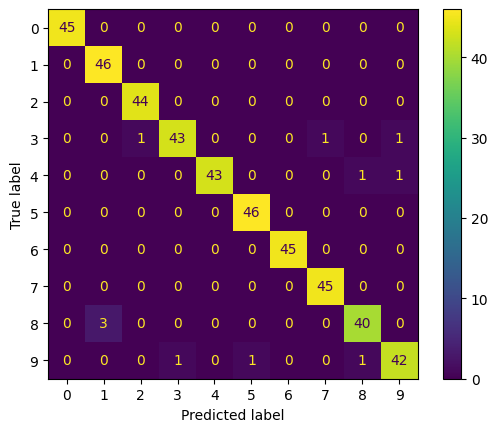

In [36]:
matrix = confusion_matrix(y_test,pred)
disp = ConfusionMatrixDisplay(confusion_matrix=matrix,display_labels=knn.classes_)
disp.plot()

## Multinomial Classification

In [76]:
# Librerias a utilizar para el clasificador multinomial
from sklearn.linear_model import LogisticRegression

In [77]:
multi = LogisticRegression()
multi.fit(X_train,y_train)

LogisticRegression()

In [78]:
multi.score(X_test,y_test)

0.9711111111111111

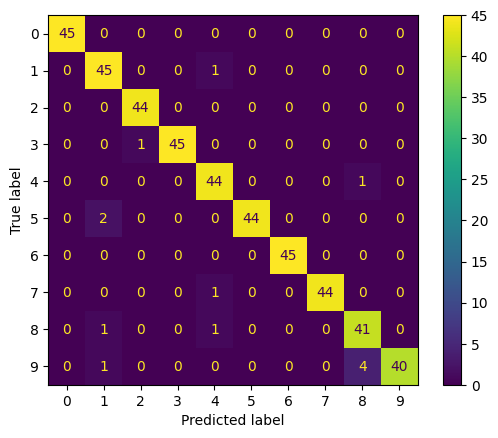

In [80]:
multi_pred = multi.predict(X_test)
multi_matrix = confusion_matrix(y_test,multi_pred)
disp_mult = ConfusionMatrixDisplay(confusion_matrix=multi_matrix,display_labels=knn.classes_)
disp_mult.plot()

In [81]:
print(
    f"Classification report for classifier multinomial classification:\n"
    f"{classification_report(y_test,multi_pred)}\n"
)

Classification report for classifier multinomial classification:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        45
           1       0.92      0.98      0.95        46
           2       0.98      1.00      0.99        44
           3       1.00      0.98      0.99        46
           4       0.94      0.98      0.96        45
           5       1.00      0.96      0.98        46
           6       1.00      1.00      1.00        45
           7       1.00      0.98      0.99        45
           8       0.89      0.95      0.92        43
           9       1.00      0.89      0.94        45

    accuracy                           0.97       450
   macro avg       0.97      0.97      0.97       450
weighted avg       0.97      0.97      0.97       450


